<a href="https://colab.research.google.com/github/dojun43/Project/blob/main/03.%20KBO%20%ED%83%80%EC%9E%90%20OPS%20%EC%98%88%EC%B8%A1%20%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C/%5BEDA%5D_KBO_%ED%83%80%EC%9E%90_OPS_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KBO 타자 OPS 예측 EDA

## 변수 설명

Pre/Regular_Season_Batter
- batter_id: 타자의 고유 아이디
- batter_name: 타자 이름
- year: 년도
- team: 소속팀
- avg: 타율
- G: 출전게임수
- AB: 타수(타석-볼넷-사구-희생번트-희생플라이)
- R: 득점
- H: 안타(1루타+2루타+3루타+홈런)
- 2B: 2루타
- 3B: 3루타
- HR: 홈런
- TB: 루타 수
- RBI: 타점
- SB: 도루 성공
- CS: 도루 실패
- BB: 볼넷
- HBP: 사구(몸에 맞는 볼)
- SO: 삼진아웃
- GDP: 병살타
- SLG: 장타율
- OBP: 출루율
- E: 에러
- height/weight: 선수의 키/몸무게
- year_born: 선수의 생년월일
- position: 선수의 수비위치
- career: 선수의 커리어
- starting_salary: 선수의 한국프로야구 입단연봉
- OPS: OPS(OBP+SLG)

Regular_Season_Batter_Day_by_Day
- batter_id: 타자의 고유 아이디
- batter_name: 타자 이름
- date: 날짜
- opposing_team: 상대 팀
- avg1: 해당 경기 타율
- AB: 해당 경기 타수
- R: 해당 경기 득점
- H: 해당 경기 안타
- 2B: 해당 경기 2루타
- 3B: 해당 경기 3루타
- HR: 해당 경기 홈런
- RBI: 해당 경기 타점
- SB: 해당 경기 도루 성공
- CS: 해당 경기 도루 실패
- BB: 해당 경기 볼넷
- HBP: 해당 경기 사구
- SO: 해당 경기 삼진아웃
- GDP: 해당 경기 병살타
- avg2: 시즌 누적 타율
- year: 년도

## 라이브러리

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#폰트 설정
'''
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
'''

plt.rc('font', family='NanumBarunGothic') 

## csv파일 읽기

In [ ]:
regular_season = pd.read_csv('/content/drive/MyDrive/프로젝트/KBO 타자 OPS 예측/Regular_Season_Batter.csv')
regular_season_day = pd.read_csv('/content/drive/MyDrive/프로젝트/KBO 타자 OPS 예측/Regular_Season_Batter_Day_by_Day_b4.csv')
pre_season = pd.read_csv('/content/drive/MyDrive/프로젝트/KBO 타자 OPS 예측/Pre_Season_Batter.csv')
submission = pd.read_csv('/content/drive/MyDrive/프로젝트/KBO 타자 OPS 예측/submission.csv')

In [ ]:
regular_season.head()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,0,8,95,34,5,0,9,8,25,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,3,1,30,7,0,0,13,2,28,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686
3,1,강경학,2015,한화,0.257,120,311,50,80,7,4,2,101,27,4,3,40,5,58,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673
4,1,강경학,2016,한화,0.158,46,101,16,16,3,2,1,26,7,0,0,8,2,30,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489


In [ ]:
regular_season_day.head()

,batter_id,batter_name,date,opposing_team,avg1,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,avg2,year
0,0,가르시아,3.24,NC,0.333,3,1,1,0,0,0,0,0,0,1,0,1,0,0.333,2018
1,0,가르시아,3.25,NC,0.000,4,0,0,0,0,0,0,0,0,0,0,1,0,0.143,2018
2,0,가르시아,3.27,넥센,0.200,5,0,1,0,0,0,0,0,0,0,0,0,0,0.167,2018
3,0,가르시아,3.28,넥센,0.200,5,1,1,0,0,0,1,0,0,0,0,0,0,0.176,2018
4,0,가르시아,3.29,넥센,0.250,4,0,1,0,0,0,3,0,0,0,0,0,1,0.190,2018


In [ ]:
pre_season.head()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,0,1,11,5,0,0,2,0,3,1,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959
1,1,강경학,2011,한화,0.000,4,2,2,0,0,0,0,0,1,0,1,0,2,1,0,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500
2,1,강경학,2014,한화,-,4,0,2,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,NaN
3,1,강경학,2015,한화,0.130,10,23,3,3,0,0,0,3,1,3,0,4,1,9,0,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416
4,1,강경학,2016,한화,0.188,14,32,4,6,1,1,0,9,2,1,2,0,1,10,0,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493


In [ ]:
submission.head()

,batter_id,batter_name
0,1,강경학
1,2,강구성
2,3,강민국
3,4,강민호
4,5,강백호


## 결측치 확인

#### regular_season

결측치 존재

- avg(타율): 26
- SLG(장타율): 26
- OBP(출루율): 24
- height/weight(선수의 키/몸무게): 802
- position(선수의 수비위치): 802
- starting_salary(선수의 한국프로야구 입단연봉): 1067
- OPS(OBP+SLG): 26

In [ ]:
regular_season.isna().sum()

batter_id             0
batter_name           0
year                  0
team                  0
avg                  26
G                     0
AB                    0
R                     0
H                     0
2B                    0
3B                    0
HR                    0
TB                    0
RBI                   0
SB                    0
CS                    0
BB                    0
HBP                   0
SO                    0
GDP                   0
SLG                  26
OBP                  24
E                     0
height/weight       802
year_born             0
position            802
career                0
starting_salary    1067
OPS                  26
dtype: int64

공통된 행에서 avg, SLG, OBP, OPS에 대한 결측치가 존재

In [ ]:
na_index = regular_season['avg'].isna()
regular_season[na_index].isna().sum()

batter_id           0
batter_name         0
year                0
team                0
avg                26
G                   0
AB                  0
R                   0
H                   0
2B                  0
3B                  0
HR                  0
TB                  0
RBI                 0
SB                  0
CS                  0
BB                  0
HBP                 0
SO                  0
GDP                 0
SLG                26
OBP                24
E                   0
height/weight       8
year_born           0
position            8
career              0
starting_salary    14
OPS                26
dtype: int64

공통된 행에서 height/weight, position, starting_salary에 대한 결측치가 존재

In [ ]:
na_index = regular_season['height/weight'].isna()
regular_season[na_index].isna().sum()

batter_id            0
batter_name          0
year                 0
team                 0
avg                  8
G                    0
AB                   0
R                    0
H                    0
2B                   0
3B                   0
HR                   0
TB                   0
RBI                  0
SB                   0
CS                   0
BB                   0
HBP                  0
SO                   0
GDP                  0
SLG                  8
OBP                  8
E                    0
height/weight      802
year_born            0
position           802
career               0
starting_salary    802
OPS                  8
dtype: int64

#### regular_season_day

결측치 없음

In [ ]:
regular_season_day.isna().sum()

batter_id        0
batter_name      0
date             0
opposing_team    0
avg1             0
AB               0
R                0
H                0
2B               0
3B               0
HR               0
RBI              0
SB               0
CS               0
BB               0
HBP              0
SO               0
GDP              0
avg2             0
year             0
dtype: int64

#### pre_season

결측치 존재

- SLG(타율): 29
- OBP(출루율): 25
- starting_salary(선수의 한국프로야구 입단연봉): 214
- OPS(OBP+SLG): 29

In [ ]:
pre_season.isna().sum()

batter_id            0
batter_name          0
year                 0
team                 0
avg                  0
G                    0
AB                   0
R                    0
H                    0
2B                   0
3B                   0
HR                   0
TB                   0
RBI                  0
SB                   0
CS                   0
BB                   0
HBP                  0
SO                   0
GDP                  0
SLG                 29
OBP                 25
E                    0
height/weight        0
year_born            0
position             0
career               0
starting_salary    214
OPS                 29
dtype: int64

## 결측치 제거

In [ ]:
regular_season = regular_season.dropna()
pre_season = pre_season.dropna()

## height/weight을 height, weight으로 분리

In [ ]:
def create_height(x):
  height = int(x[0:3])
  return height

def create_weight(x):
  if len(x) == 10:
    weight = int(x[6:8])
  else:
    weight = int(x[6:9])
  return weight

In [ ]:
regular_season['height'] = 0
regular_season['weight'] = 0
regular_season['height'] = regular_season['height/weight'].apply(create_height)
regular_season['weight'] = regular_season['height/weight'].apply(create_weight)

pre_season['height'] = 0
pre_season['weight'] = 0
pre_season['height'] = pre_season['height/weight'].apply(create_height)
pre_season['weight'] = pre_season['height/weight'].apply(create_weight)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

## regular_season: salary 만원 단위로 변환 

In [ ]:
salary_list = [] 

for salary in regular_season['starting_salary']:
  if '만원' in salary:
    salary = salary.strip('만원')
    salary = int(salary)
    salary_list.append(salary)

  elif '달러' in salary:
    salary = salary.strip('달러')
    salary = int(salary) * 1190 / 10000
    salary_list.append(salary)

regular_season['starting_salary'] = salary_list

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## 상관관계

#### regular_season
- OPS와 상관관계가 높았던 변수: avg, SLG, OBP
- OPS와 상관관계가 낮은 변수: 3B, SB, CS, E, starting_salary, height, weight

In [ ]:
regular_season.corr()

,batter_id,year,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,starting_salary,OPS,height,weight
batter_id,1.000000,-0.052072,-0.032094,-0.026409,-0.021904,-0.033941,-0.021294,-0.013165,-0.062310,0.010916,-0.014186,-0.001386,-0.027770,-0.032383,-0.022460,0.004775,-0.024620,-0.003720,-0.006306,-0.027436,-0.034700,-0.000890,-0.015338,0.085054,0.054992
year,-0.052072,1.000000,0.061112,0.063008,0.048360,0.082226,0.072735,0.084692,-0.017763,0.097408,0.083914,0.103796,-0.106294,-0.097774,0.010631,0.046492,0.084852,0.054851,0.082091,0.097026,-0.039848,-0.147923,0.091738,-0.108170,-0.190023
avg,-0.032094,0.061112,1.000000,0.483860,0.491241,0.490830,0.518778,0.479279,0.261484,0.366520,0.501941,0.466685,0.238136,0.270897,0.442914,0.322270,0.409441,0.399978,0.861876,0.907023,0.236978,0.142018,0.916835,0.020032,0.101143
G,-0.026409,0.063008,0.483860,1.000000,0.937628,0.871748,0.899938,0.836292,0.470913,0.643303,0.874202,0.820422,0.466012,0.537826,0.819283,0.621931,0.859834,0.755006,0.493580,0.507238,0.558800,0.220982,0.519994,0.027030,0.131914
AB,-0.021904,0.048360,0.491241,0.937628,1.000000,0.949429,0.985248,0.918914,0.509257,0.726265,0.963712,0.903334,0.518014,0.573767,0.884726,0.644123,0.883209,0.796778,0.515897,0.501243,0.540227,0.239650,0.531502,0.047775,0.184015
R,-0.033941,0.082226,0.490830,0.871748,0.949429,1.000000,0.962918,0.903004,0.550745,0.758179,0.958812,0.897331,0.560001,0.574063,0.881706,0.639148,0.835665,0.715316,0.531895,0.506898,0.475649,0.231622,0.543882,0.011918,0.129266
H,-0.021294,0.072735,0.518778,0.899938,0.985248,0.962918,1.000000,0.933247,0.507207,0.744764,0.980081,0.920954,0.504756,0.553727,0.884654,0.630530,0.842002,0.787454,0.539666,0.519827,0.493061,0.224354,0.554119,0.046964,0.188691
2B,-0.013165,0.084692,0.479279,0.836292,0.918914,0.903004,0.933247,1.000000,0.438967,0.733560,0.940126,0.890689,0.413284,0.461042,0.819419,0.603144,0.812331,0.744001,0.537006,0.479243,0.480228,0.228433,0.535613,0.063604,0.203197
3B,-0.062310,-0.017763,0.261484,0.470913,0.509257,0.550745,0.507207,0.438967,1.000000,0.173673,0.461895,0.360584,0.600889,0.556959,0.391007,0.233382,0.421218,0.233395,0.234668,0.238665,0.282070,0.075359,0.246190,-0.057004,-0.162123
HR,0.010916,0.097408,0.366520,0.643303,0.726265,0.758179,0.744764,0.733560,0.173673,1.000000,0.857941,0.902554,0.117797,0.168429,0.751443,0.632575,0.762734,0.646671,0.555909,0.403041,0.337103,0.228890,0.515852,0.207733,0.422955


#### regular_season_day

In [ ]:
regular_season_day.corr()

,batter_id,date,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,avg2,year
batter_id,1.000000,0.007832,-0.025926,-0.021180,-0.017291,-0.005111,-0.008969,-0.003720,-0.008406,-0.004504,-0.002738,-0.020561,0.009135,-0.001688,0.000446,-0.017110,-0.020078
date,0.007832,1.000000,-0.036159,-0.012193,-0.011597,-0.009326,-0.008749,0.004097,-0.005856,-0.012693,-0.015038,-0.019218,-0.011019,-0.015063,-0.006784,0.043913,0.002918
AB,-0.025926,-0.036159,1.000000,0.311749,0.555567,0.238384,0.080741,0.179693,0.304427,0.094110,0.049681,-0.017432,-0.025734,0.345635,0.115188,0.311193,0.013228
R,-0.021180,-0.012193,0.311749,1.000000,0.538340,0.258515,0.124891,0.439775,0.412689,0.171445,0.003960,0.237538,0.092594,-0.031933,-0.007495,0.189211,0.030401
H,-0.017291,-0.011597,0.555567,0.538340,1.000000,0.431746,0.140765,0.327347,0.511670,0.165731,0.110300,0.038353,-0.000862,-0.047615,-0.013764,0.320639,0.028862
2B,-0.005111,-0.009326,0.238384,0.258515,0.431746,1.000000,0.008247,0.017589,0.249786,0.012480,0.007542,0.019842,0.001230,-0.017299,-0.006913,0.132653,0.018087
3B,-0.008969,-0.008749,0.080741,0.124891,0.140765,0.008247,1.000000,-0.007007,0.114843,0.022231,0.008673,0.005750,0.000708,-0.008302,-0.006418,0.042409,-0.003405
HR,-0.003720,0.004097,0.179693,0.439775,0.327347,0.017589,-0.007007,1.000000,0.607627,-0.018619,-0.012477,0.037526,0.012014,0.000574,0.004660,0.107057,0.028874
RBI,-0.008406,-0.005856,0.304427,0.412689,0.511670,0.249786,0.114843,0.607627,1.000000,0.028557,0.008699,0.053516,0.016407,-0.016889,0.000833,0.175691,0.030894
SB,-0.004504,-0.012693,0.094110,0.171445,0.165731,0.012480,0.022231,-0.018619,0.028557,1.000000,0.031913,0.113177,0.030765,-0.029597,-0.016623,0.054526,-0.040681


### pre_season

In [ ]:
pre_season.corr()

,batter_id,year,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS,height,weight
batter_id,1.000000,-0.052792,0.005696,-0.005760,-0.013372,-0.028680,-0.036048,-0.046395,0.032413,-0.019032,0.025042,-0.027839,-0.017949,-0.061873,0.024006,-0.029736,0.033869,-0.035672,-0.056221,0.008355,-0.046625,0.081396,0.062781
year,-0.052792,1.000000,-0.059280,-0.138733,-0.041220,-0.064962,-0.076540,0.036202,-0.046115,-0.067941,-0.050773,-0.096652,-0.010017,-0.045703,-0.059407,-0.112606,-0.075695,0.029586,0.112239,-0.127124,0.064200,-0.078955,-0.171275
G,0.005696,-0.059280,1.000000,0.709045,0.657555,0.603843,0.323682,0.281172,0.154415,0.538271,0.394795,0.359908,0.226409,0.359201,0.153394,0.538976,0.233843,0.042812,0.095992,0.178424,0.067054,-0.049249,-0.084243
AB,-0.005760,-0.138733,0.709045,1.000000,0.719358,0.879008,0.546279,0.309703,0.342416,0.827519,0.628733,0.377833,0.230606,0.518540,0.184048,0.699001,0.375332,0.166224,0.162294,0.237032,0.178476,0.033942,0.051753
R,-0.013372,-0.041220,0.657555,0.719358,1.000000,0.760646,0.466445,0.298353,0.423164,0.764745,0.557578,0.458633,0.215721,0.488900,0.185270,0.467350,0.195808,0.314000,0.312298,0.146685,0.339370,-0.012811,-0.038153
H,-0.028680,-0.064962,0.603843,0.879008,0.760646,1.000000,0.635249,0.300057,0.390740,0.937857,0.692445,0.367186,0.224075,0.459378,0.148339,0.511682,0.301998,0.405176,0.423084,0.181440,0.445735,0.034980,0.078123
2B,-0.036048,-0.076540,0.323682,0.546279,0.466445,0.635249,1.000000,0.125758,0.168298,0.667477,0.483978,0.175491,0.059710,0.303449,0.103568,0.308543,0.195011,0.347905,0.286484,0.123996,0.352849,0.062054,0.085485
3B,-0.046395,0.036202,0.281172,0.309703,0.298353,0.300057,0.125758,1.000000,-0.010171,0.336707,0.186071,0.235233,0.105691,0.101790,-0.005925,0.201234,0.073904,0.153953,0.060547,0.083453,0.130372,-0.073699,-0.136930
HR,0.032413,-0.046115,0.154415,0.342416,0.423164,0.390740,0.168298,-0.010171,1.000000,0.643390,0.666089,-0.016506,-0.002805,0.259576,0.079565,0.258217,0.125014,0.500018,0.204125,0.034955,0.426337,0.164912,0.275749
TB,-0.019032,-0.067941,0.538271,0.827519,0.764745,0.937857,0.667477,0.336707,0.643390,1.000000,0.798235,0.291376,0.167092,0.457511,0.142378,0.503959,0.284270,0.524493,0.405831,0.162333,0.521804,0.084449,0.148789


## 시각화

#### regular_season

타율-OPS 산점도

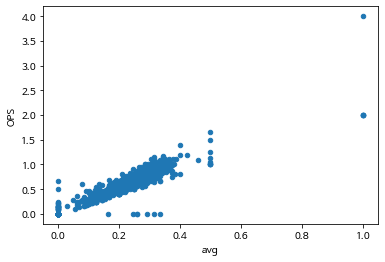

In [ ]:
regular_season.plot(x='avg',y='OPS',kind='scatter')

장타율-OPS 산점도

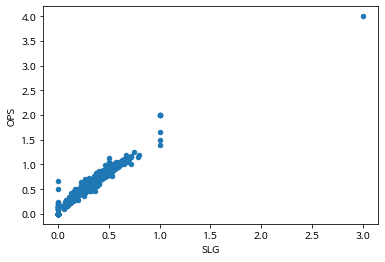

In [ ]:
regular_season.plot(x='SLG',y='OPS',kind='scatter')

출루율-OPS 산점도

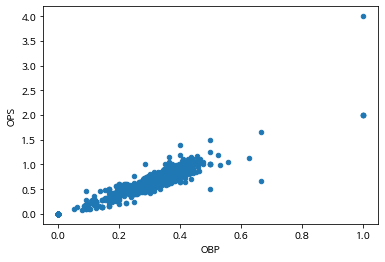

In [ ]:
regular_season.plot(x='OBP',y='OPS',kind='scatter')

2루타-OPS 산점도

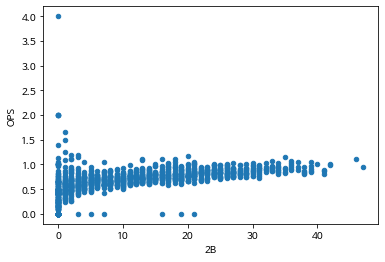

In [ ]:
regular_season.plot(x='2B',y='OPS',kind='scatter')

3루타-OPS 산점도

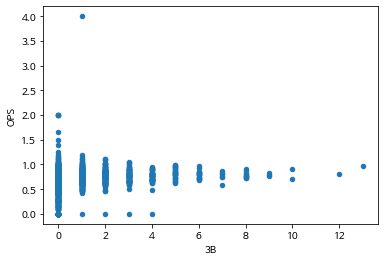

In [ ]:
regular_season.plot(x='3B',y='OPS',kind='scatter')

도루 성공-OPS 산점도

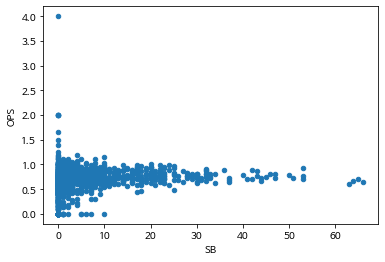

In [ ]:
regular_season.plot(x='SB',y='OPS',kind='scatter')

도루 실패-OPS 산점도

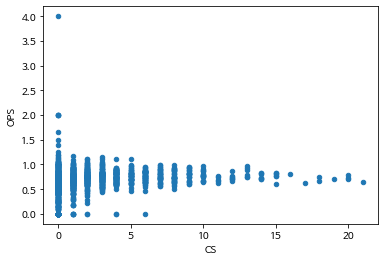

In [ ]:
regular_season.plot(x='CS',y='OPS',kind='scatter')

starting_salary-OPS 산점도

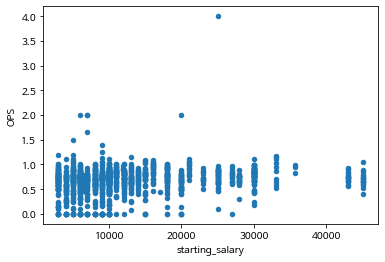

In [ ]:
regular_season.plot(x='starting_salary',y='OPS',kind='scatter')

height-OPS 산점도 

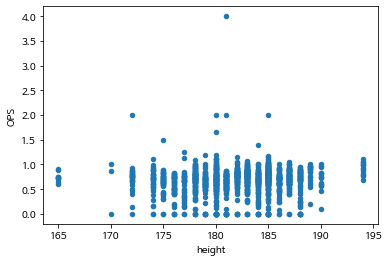

In [ ]:
regular_season.plot(x='height',y='OPS',kind='scatter')

weight-OPS 산점도

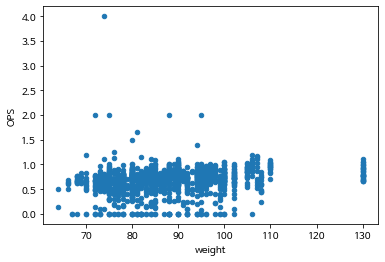

In [ ]:
regular_season.plot(x='weight',y='OPS',kind='scatter')

팀 별 OPS 평균

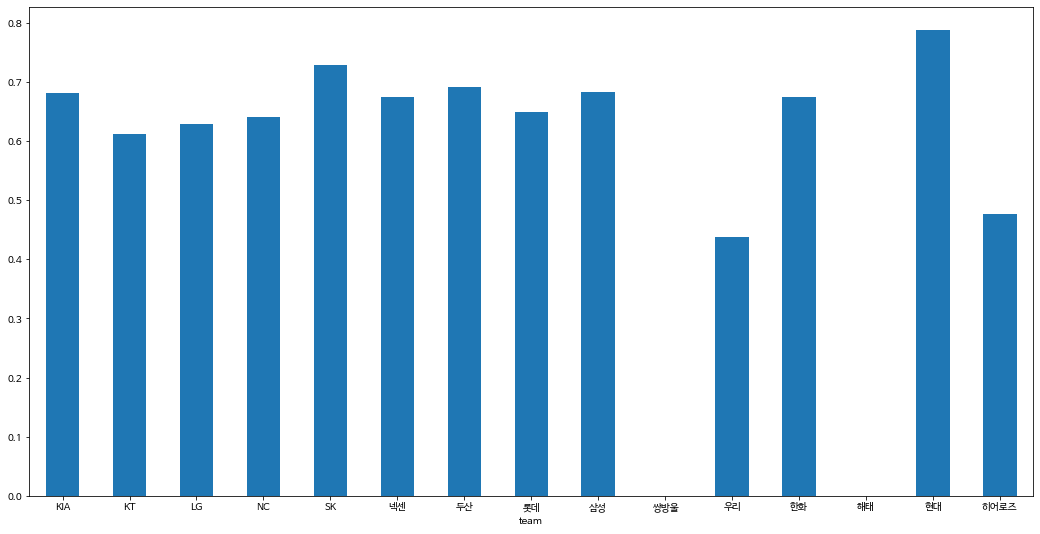

In [ ]:
plt.figure(figsize=(18,9))

regular_season_group_team =  regular_season.groupby('team').mean()
regular_season_group_team['OPS'].plot(kind='bar', rot=0)

연도 별 OPS 평균

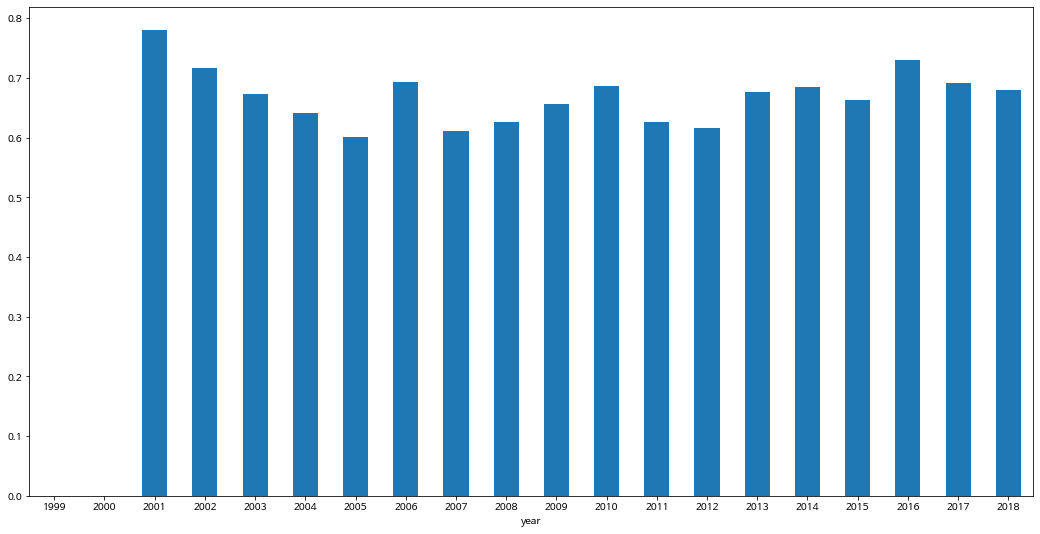

In [ ]:
plt.figure(figsize=(18,9))

regular_season_group_year =  regular_season.groupby('year').mean()
regular_season_group_year['OPS'].plot(kind='bar', rot=0)

선수의 수비위치 별 OPS 평균

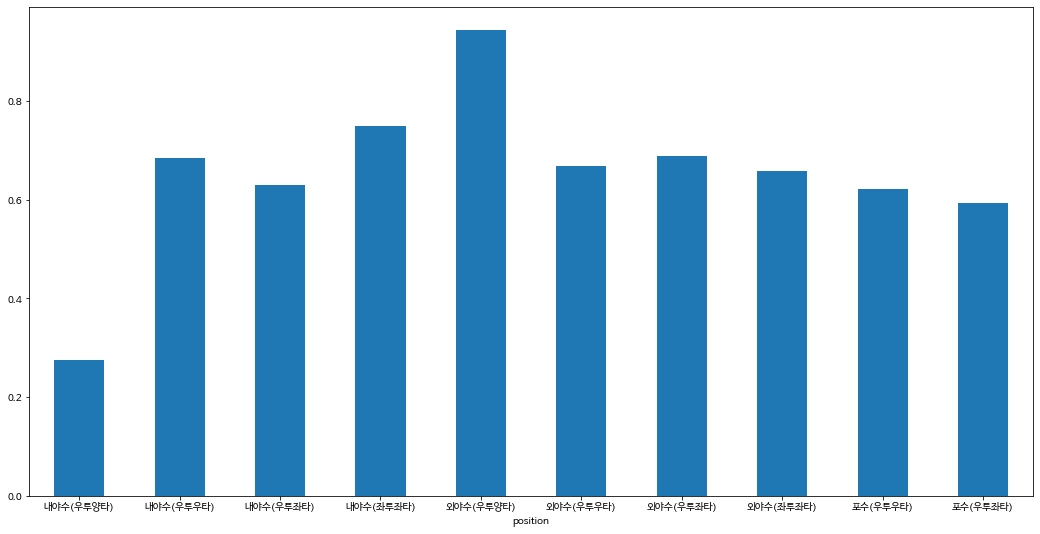

In [ ]:
plt.figure(figsize=(18,9))

regular_season_group_position =  regular_season.groupby('position').mean()
regular_season_group_position['OPS'].plot(kind='bar', rot=0)

초기 연봉 별 OPS 평균

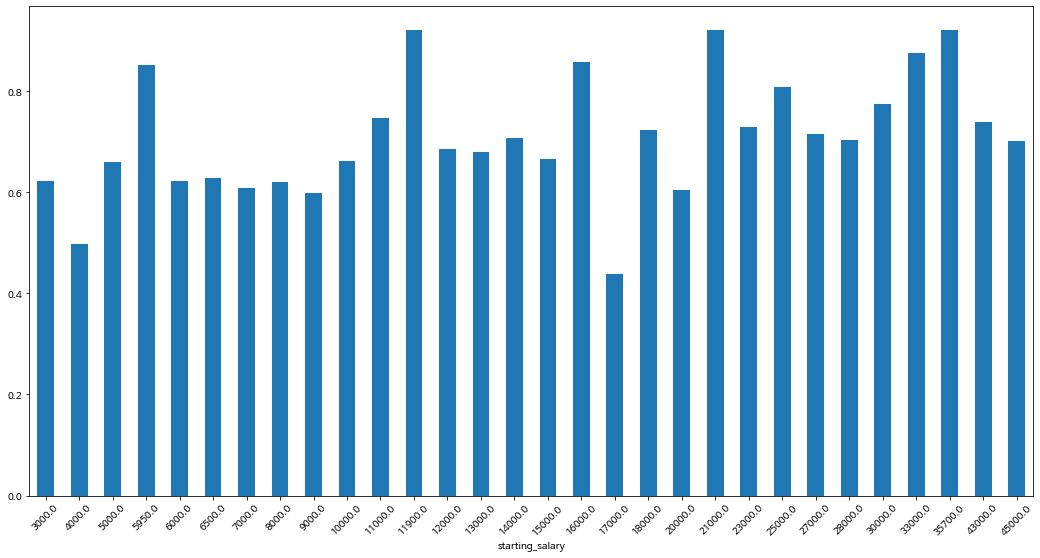

In [ ]:
plt.figure(figsize=(18,9))

regular_season_group_starting_salary =  regular_season.groupby('starting_salary').mean()
regular_season_group_starting_salary['OPS'].plot(kind='bar', rot=45)

## EDA 요약 

regular_reason 

- 공통된 행에서 avg, SLG, OBP, OPS에 대한 결측치가 존재
- 공통된 행에서 height/weight, position, starting_salary에 대한 결측치가 존재
- OPS와 상관관계가 높았던 변수: SLG, OBP
- OPS와 상관관계가 낮았던 변수: 3B, SB, CS, E, starting_salary, height, weight
- 팀별, 연도별, 초기 연봉 별 시각화 해본 결과 OPS와 연관이 없는 것으로 보임 
- 선수의 수비위치 별 OPS 평균을 살펴보았을때 내야수의 OPS가 눈에 띄게 낮았음, 나머지는 비슷 